In [1]:
import pandas as pd
import os
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2



# List to hold data from each .pkl file
data_frames = []

flag = 0
for filename in os.listdir('./'):
    if filename.endswith('.pkl'):
        data_frame = pd.read_pickle(filename)
        if  flag == 1 :
            data_frame = data_frame.drop(['unique_id', 'ds', 'y'], axis=1)
        data_frames.append(data_frame)
        flag = 1
        print(filename)

# Concatenate all dataframes horizontally
results_df = pd.concat(data_frames, axis=1)
df = results_df[['unique_id', 'ds', 'y', 'LSTM', 'DilatedRNN', 'TFT', 'TCN', 'TiDE', 'TimesNet', 'TimeLLM','TSMixer-TrafficL',  'PatchTST-TrafficL', 'PatchTST-Weather', 'PatchTST-M4', 'iTransformer-M4', 'iTransformer-TrafficL']]

print("Data frames concatenated successfully.")
print(df)

import numpy as np

# Ensure the data is sorted by unique_id and ds
df = df.sort_values(by=['unique_id', 'ds'])

# List of features to be used
features = ['DilatedRNN', 'PatchTST-TrafficL', 'TCN', 'TimesNet', 'TimeLLM', 'TFT', 'PatchTST-Weather', 'TiDE', 'PatchTST-M4', 'iTransformer-TrafficL','LSTM']
test_length = 1000
time_steps = 20
look_back = 1

# Initialize lists to hold the transformed data
train_data, train_targets, test_data, test_targets = [], [], [], []

# Iterate over each unique_id (time series)
for unique_id in df['unique_id'].unique():
    ts_data = df[df['unique_id'] == unique_id].reset_index(drop=True)
    ts_length = len(ts_data)
    split_point = ts_length - test_length

    # Prepare arrays for faster indexing
    feature_data = ts_data[features].values
    target_data = ts_data['y'].values
    def process_data(start, end, data_list, target_list):
        for i in range(start, end):
            past_features = feature_data[i-time_steps:i]
            look_backs = np.copy(target_data[i-time_steps:i].reshape(time_steps, 1))
            look_backs[-1,:] = look_backs[-2,:]
            # look_backs = [target_data[i-time_steps-j:i-j].reshape(time_steps, 1) for j in range(1, look_back+1)]
            concatenated = np.hstack([past_features] + [look_backs])
            data_list.append(concatenated)
            target_list.append(target_data[i-1])

    # Process training and testing data
    process_data(time_steps + look_back, split_point + 1, train_data, train_targets)
    process_data(split_point + 1, ts_length + 1, test_data, test_targets)

# Convert lists to numpy arrays
X_train, y_train = np.array(train_data), np.array(train_targets)
X_test, y_test = np.array(test_data), np.array(test_targets)

# Display shape information
print(f'Shape of X_train: {X_train.shape}')  # Expected: (number of training samples, time_steps, number of features)
print(f'Shape of y_train: {y_train.shape}')  # Expected: (number of training samples,)
print(f'Shape of X_test: {X_test.shape}')    # Expected: (number of test samples, time_steps, number of features)
print(f'Shape of y_test: {y_test.shape}')    # Expected: (number of test samples,)



2024-11-22 23:32:06.408062: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-22 23:32:07.035518: I tensorflow/core/platform/cpu_feature_guard.cc:183] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE3 SSE4.1 SSE4.2 AVX, in other operations, rebuild TensorFlow with the appropriate compiler flags.


DilatedRNN_prcp.pkl
TimesNet_prcp.pkl
TFT_prcp.pkl
iTransformer-M4_prcp.pkl
TiDE_prcp.pkl
TCN_prcp.pkl
PatchTST-Weather_prcp.pkl
TSMixer_prcp.pkl
TSMixer-TrafficL_prcp.pkl
PatchTST-TrafficL_prcp.pkl
TimeLLM_prcp.pkl
PatchTST-M4_prcp.pkl
TSMixer-M4_prcp.pkl
TimeLLM-untuned_prcp.pkl
LSTM_prcp.pkl
iTransformer-TrafficL_prcp.pkl
Data frames concatenated successfully.
        unique_id         ds       y       LSTM  DilatedRNN        TFT  \
0         1013500 2000-10-15    1.32   3.757282    5.243925   4.556545   
1         1013500 2000-10-16    0.01   0.467231    0.471088  -0.576547   
2         1013500 2000-10-17    0.00   0.728021    0.944711   0.713979   
3         1013500 2000-10-18    6.23   1.158728    1.205182   0.485369   
4         1013500 2000-10-19    3.07   8.275459    7.654356   7.380338   
...           ...        ...     ...        ...         ...        ...   
2012995  14400000 2008-12-27   87.46  24.871161   22.917757  25.285467   
2012996  14400000 2008-12-28  141.28  75.3

In [2]:
# # Ensure the data is sorted by unique_id and ds
# df = df.sort_values(by=['unique_id', 'ds'])

# # List of features to be used
# features = ['LSTM', 'DilatedRNN', 'TFT', 'TCN', 'TiDE', 'TimesNet', 'TimeLLM','TSMixer-TrafficL',  'PatchTST-TrafficL', 'PatchTST-Weather', 'PatchTST-M4', 'iTransformer-M4', 'iTransformer-TrafficL']
# test_length = 1000
# time_steps = 20
# look_back = 1
# batch_size = 50

# # Initialize lists to hold the transformed data
# all_data, all_targets = [], []


# ts_length = len(df[df['unique_id'] == 1013500])
# split_point = ts_length - test_length
# for day in range(time_steps + look_back -1, ts_length):
#     print(day)
#     # Iterate over each unique_id (time series)
#     for unique_id in df['unique_id'].unique():
#         ts_data = df[df['unique_id'] == unique_id].reset_index(drop=True)

#         # Prepare arrays for faster indexing
#         feature_data = ts_data[features].values
#         target_data = ts_data['y'].values
#         def process_data(start, data_list, target_list):
#             past_features = feature_data[start-time_steps:start]
#             look_backs = np.copy(target_data[start-time_steps:start].reshape(time_steps, 1))
#             look_backs[-1,:] = look_backs[-2,:]
#             concatenated = np.hstack([past_features] + [look_backs])
#             data_list.append(concatenated)
#             target_list.append(target_data[start-1])

#         # Process training and testing data
#         process_data(day, all_data, all_targets)

        
        
# # Convert lists to numpy arrays first
# all_data = np.array(all_data)
# all_targets = np.array(all_targets)
# # Initialize lists to hold the transformed data
# train_data, train_targets, test_data, test_targets = [], [], [], []
# # Convert lists to numpy arrays
# X_train, y_train = np.array(all_data[:1328580, :, :]), np.array(all_targets[:1328580])
# X_test, y_test = np.array(all_data[1328580:, :, :]), np.array(all_targets[1328580:])
# # Display shape information
# print(f'Shape of X_train: {X_train.shape}')  # Expected: (number of training samples, time_steps, number of features)
# print(f'Shape of y_train: {y_train.shape}')  # Expected: (number of training samples,)
# print(f'Shape of X_test: {X_test.shape}')    # Expected: (number of test samples, time_steps, number of features)
# print(f'Shape of y_test: {y_test.shape}')    # Expected: (number of test samples,)


In [3]:
from tensorflow.keras.layers import Input, Dense, LayerNormalization, Dropout, Attention, MultiHeadAttention, GlobalAveragePooling1D, Concatenate
from tensorflow.keras.models import Model

#-------------------------------------------------------------
# Set the seed for reproducibility
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
#-------------------------------------------------------------
batch_size = 64
def build_hybrid_attention_model(batch_size, time_steps, num_features):
    
    # Input layer
    input_data = Input(shape=(time_steps, num_features))  # Shape: (batch_size, time_steps, num_features)

    # Cross-Attention Layer
    Cross_Attention = 32
    # input_data = Dense(Cross_Attention)(input_data)
    
    query = input_data[:, :, :-1]  # Process historical actual values
    # query = tf.tile(query, [1, 1, num_features-1])
    keys = values = input_data[:, :, -1:]  # Process predicted values
    attention_output = MultiHeadAttention(num_heads=4, key_dim=Cross_Attention, value_dim=Cross_Attention)(query=query, key=keys, value=values)


    # Concatenate attention output with original input
    combined = Concatenate(axis=-1)([input_data[:, :, -1:], attention_output])
    # combined = Dropout(0.25)(combined)
    combined = Dense(32, activation='relu')(combined)
 
#     # Reshape input to treat batch_size as part of the sequence dimension (locations)
#     reshaped_input = tf.reshape(combined, (1, batch_size * time_steps, Cross_Attention+1))  # Shape: (1, batch_size * time_steps, num_features)
#     # Apply attention over the reshaped input (locations are now part of the sequence)
#     location_att = MultiHeadAttention(num_heads=4, key_dim=16)(reshaped_input, reshaped_input)
#     # Reshape back to the original (batch_size, time_steps, num_features)
#     location_att = tf.reshape(location_att, (batch_size, time_steps, Cross_Attention+1))  # Shape: (batch_size, time_steps, num_features)
    
    
    # Concatenate attention output with original input
    # combined = Concatenate(axis=-1)([input_data[:, :, -1:], combined])   
    
    
    # LSTM/GRU Layer for temporal dependencies
    lstm_output = LSTM(32, return_sequences=True)(combined)
    lstm_output = LSTM(16, return_sequences=False)(lstm_output)
    
    # inputti = Concatenate(axis=-1)([attention_output[:, -1, :], lstm_output])
    # Dense Layers for prediction
    dense_1 = Dense(16, activation='relu')(lstm_output)
    # dense_2 = Dense(16, activation='relu')(dense_1)

    # Output Layer
    output = Dense(1)(dense_1)

    
    
#     attn_output = MultiHeadAttention(num_heads=1, key_dim=16)(input_layer, input_layer)
#     dense = Dense(16, activation='relu')(attn_output)
    
#     # attn_output = MultiHeadAttention(num_heads=2, key_dim=16)(dense, dense)
#     # dense = Dense(32, activation='relu')(attn_output)
    
    
# #     # Transpose to (batch_size, num_features, time_steps)
# #     transposed_input = tf.transpose(input_layer, perm=[0, 2, 1])
    
#     latest_timestep = dense[:, -1, :]  # Shape: (batch_size, num_features)
    
#     # Fully connected layers
#     dense = Dense(16, activation='relu')(latest_timestep)
#     # dropout2 = Dropout(0.1)(dense2)
#     output = Dense(1, activation='linear')(dense)  # Regression output
    
    
    
    
    # Define the model
    model = Model(inputs=input_data, outputs=output)
    
    # Compile the model
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='mse', metrics=['mae'])
    
    return model

# Get the number of features from the data
num_features = X_train.shape[2]

# Build the model
model = build_hybrid_attention_model(batch_size, time_steps, num_features)

# Print the model summary
model.summary()


2024-11-22 23:33:40.472395: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1636] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30874 MB memory:  -> device: 0, name: Tesla V100-SXM2-32GB, pci bus id: 0000:18:00.0, compute capability: 7.0


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 20, 12)]             0         []                            
                                                                                                  
 tf.__operators__.getitem (  (None, 20, 11)               0         ['input_1[0][0]']             
 SlicingOpLambda)                                                                                 
                                                                                                  
 tf.__operators__.getitem_1  (None, 20, 1)                0         ['input_1[0][0]']             
  (SlicingOpLambda)                                                                               
                                                                                              

Epoch 1/100


2024-11-22 23:33:46.867753: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8904
2024-11-22 23:33:47.022741: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f8ab434b500 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-22 23:33:47.022787: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Tesla V100-SXM2-32GB, Compute Capability 7.0
2024-11-22 23:33:47.120589: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-22 23:33:47.873410: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20760/20760 [==============================] - ETA: 0s - loss: 42.7048 - mae: 3.1314
Epoch 1: Train Loss: 42.70477, Validation Loss: 35.84377

20760/20760 [==============================] - 136s 6ms/step - loss: 42.7048 - mae: 3.1314 - val_loss: 35.8438 - val_mae: 2.8196
Epoch 2/100
20755/20760 [============================>.] - ETA: 0s - loss: 33.3319 - mae: 2.7300
Epoch 2: Train Loss: 33.33045, Validation Loss: 31.56815

20760/20760 [==============================] - 129s 6ms/step - loss: 33.3304 - mae: 2.7300 - val_loss: 31.5682 - val_mae: 2.6483
Epoch 3/100
20751/20760 [============================>.] - ETA: 0s - loss: 30.5367 - mae: 2.6348
Epoch 3: Train Loss: 30.53168, Validation Loss: 29.99698

20760/20760 [==============================] - 129s 6ms/step - loss: 30.5317 - mae: 2.6347 - val_loss: 29.9970 - val_mae: 2.5775
Epoch 4/100
20754/20760 [============================>.] - ETA: 0s - loss: 29.3314 - mae: 2.5971
Epoch 4: Train Loss: 29.32988, Validation Loss: 29.14465

20760

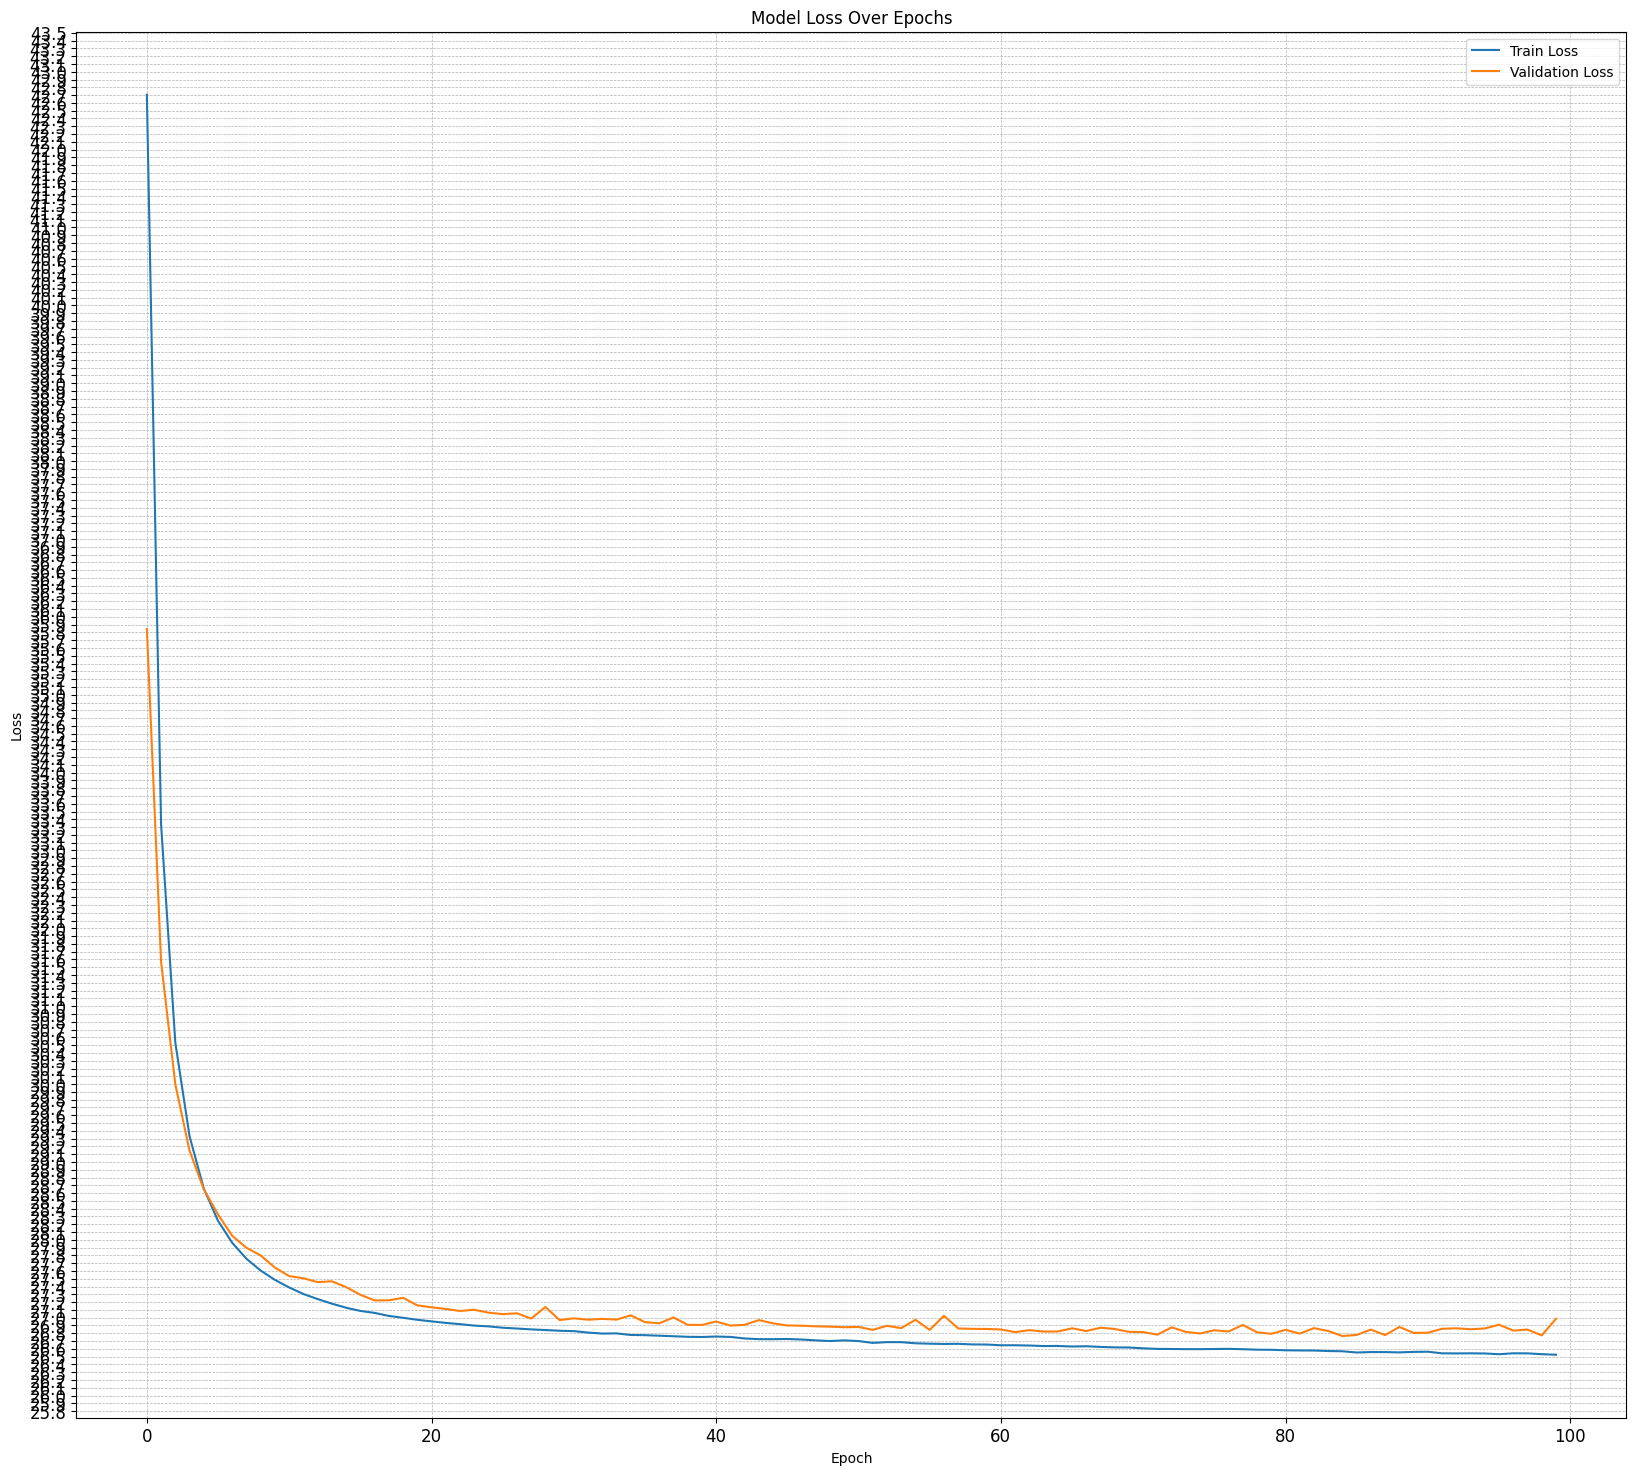

Final Train Loss: 26.52468
Final Validation Loss: 26.98490
10485/10485 [==============================] - 22s 2ms/step


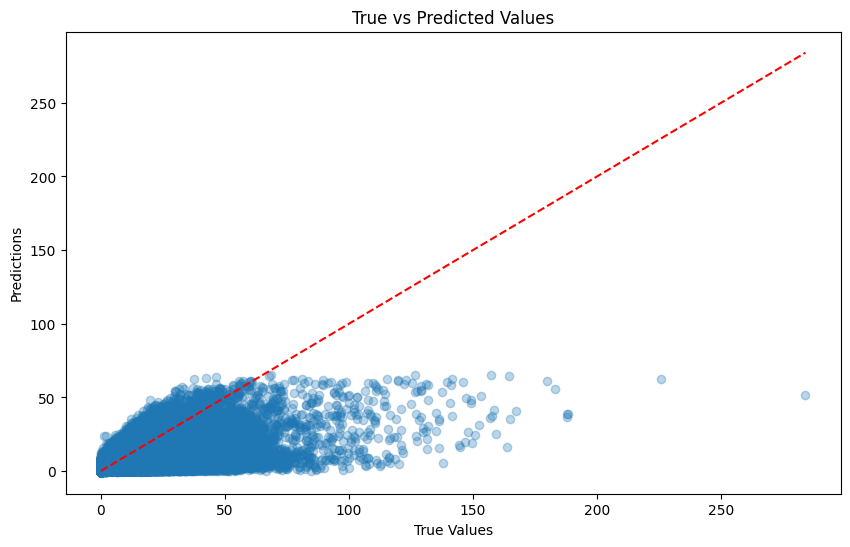

In [4]:
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

#-------------------------------------------------------------
# Set the seed for reproducibility
seed = 100
np.random.seed(seed)
tf.random.set_seed(seed)
random.seed(seed)
#-------------------------------------------------------------


# Custom callback to print loss with 5 decimal places
class PrintLossCallback(Callback):
    def on_epoch_end(self, epoch, logs=None):
        train_loss = logs.get('loss')
        val_loss = logs.get('val_loss')
        print(f"\nEpoch {epoch + 1}: Train Loss: {train_loss:.5f}, Validation Loss: {val_loss:.5f}\n")

# Define callbacks
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
# reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
print_loss = PrintLossCallback()

# Train the model with custom loss printing
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=batch_size,
    validation_data=(X_test, y_test),
    callbacks=[print_loss],
    verbose=1
)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print(f"Test Loss (MSE): {test_loss:.5f}")
print(f"Test MAE: {test_mae:.5f}")

# Plot training & validation loss values
plt.figure(figsize=(20, 18))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
# Adding grid
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Customize ticks
plt.xticks(fontsize=12)

# Increase number of y-axis ticks
plt.yticks(fontsize=12)
plt.locator_params(axis='y', nbins=200)  # Increase the number of y-axis bins
plt.legend()
# Display the plot
plt.show()

# Print final losses with precision of 5 decimal places
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print(f"Final Train Loss: {final_train_loss:.5f}")
print(f"Final Validation Loss: {final_val_loss:.5f}")

# Make predictions and visualize results
y_pred = model.predict(X_test, batch_size=batch_size)
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.title('True vs Predicted Values')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

In [5]:
def mean_absolute_error(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

def normalized_nash_sutcliffe_efficiencySTavg(y_true, y_pred): # axis 0 space 1 time
    NSE = 1 - np.sum (np.square(y_true - y_pred) ) / np.sum( np.square(y_true - np.mean(y_true)) )
    return 1 / ( 2 - NSE)

def mean_squared_error(y_true, y_pred):
    return np.mean(np.square(y_true - y_pred))

Y_ACTUAL = y_test.reshape(671, 1000)
Y_HAT = y_pred.reshape(671, 1000)

MAE = mean_absolute_error(Y_ACTUAL, Y_HAT)
MSE = mean_squared_error(Y_ACTUAL, Y_HAT)
NNSE = normalized_nash_sutcliffe_efficiencySTavg(Y_ACTUAL, Y_HAT)


print("MSE: ", MSE)
print("MAE: ", MAE)
print("NNSE1: ", NNSE)

MSE:  26.98477724253308
MAE:  2.4773310248341733
NNSE1:  0.6308471850112675


In [6]:
# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print(f"Test Loss (MSE): {test_loss:.5f}")
print(f"Test MAE: {test_mae:.5f}")


10485/10485 [==============================] - 25s 2ms/step - loss: 26.9849 - mae: 2.4773
Test Loss (MSE): 26.98490
Test MAE: 2.47734
